<a href="https://colab.research.google.com/github/Isaac-LaF/PHSX-Lab-2/blob/main/triple_local_mag_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

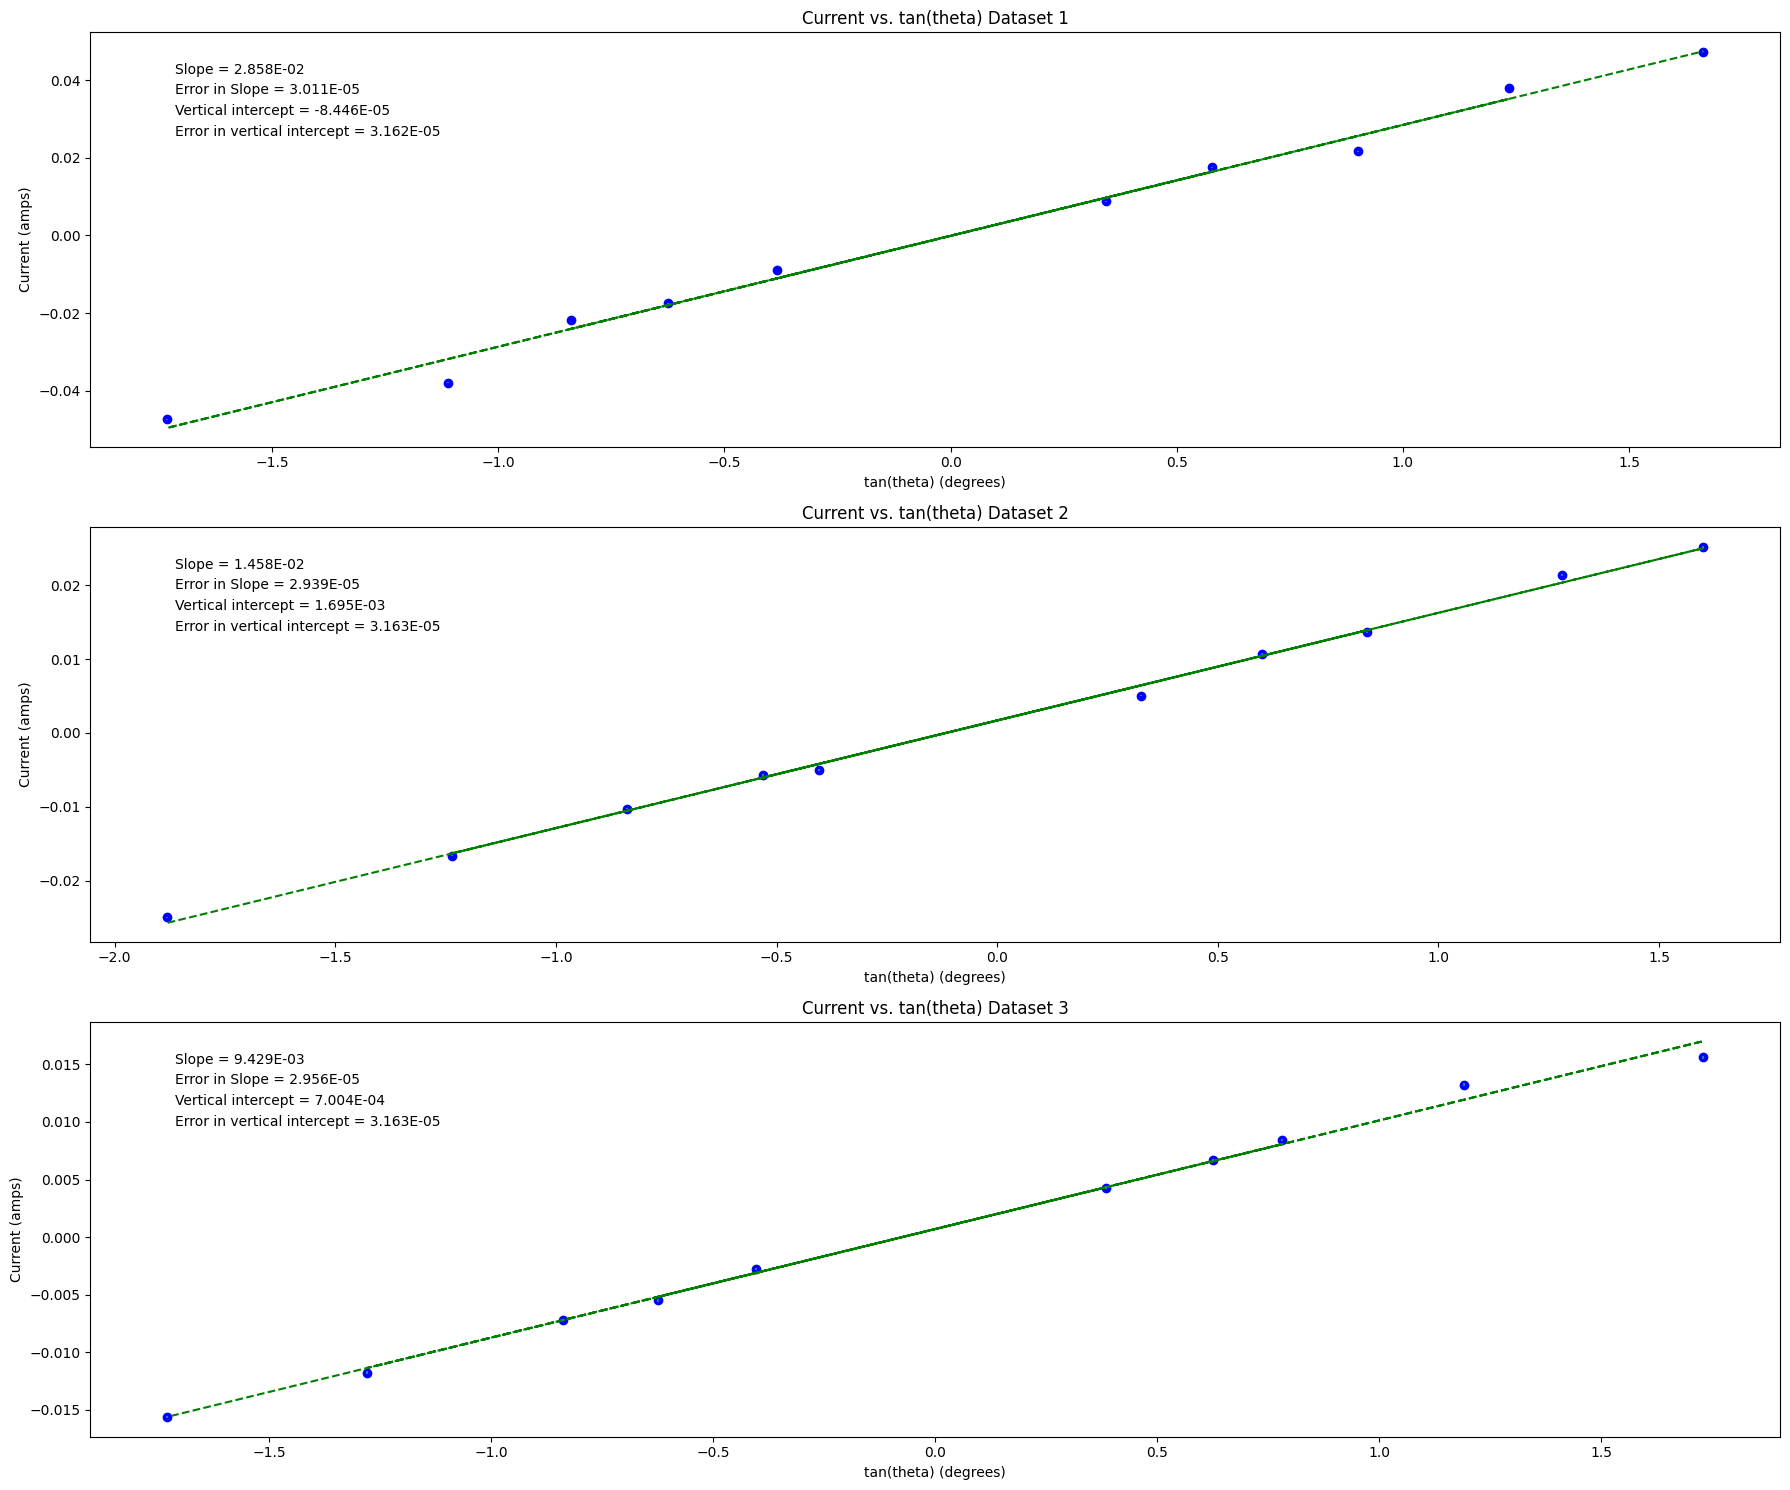

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1
I1 = np.array([-.00888, .00883, .01752, -.01746, -.0218, .0217, .038, -.0379, -.0474, .0474])  # Current (amps)
tan_theta1 = np.array([-.3838, .3443, .5774, -.6249, -.8391, .9, 1.235, -1.111, -1.732, 1.664])  # tan(theta) for Dataset 1
error_1 = np.array([.0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001])  # Error in y for Dataset 1

# Dataset 2
I2 = np.array([.00506, -.00501, -.00572, .01068, .01364, -.01026, -.01663, .0214, .0252, -.025])  # Current (amps)
tan_theta2 = np.array([.3249, -.4040, -.5317, .6009, .8391, -.8391, -1.235, 1.2799, 1.6, -1.881])  # tan(theta) for Dataset 2
error_2 = np.array([.0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001])  # Error in y for Dataset 2

# Dataset 3
I3 = np.array([.0043, -.0028, -.0055, .00672, .00841, -.00718, -.01177, .01325, .0156, -.0156])  # Current (amps)
tan_theta3 = np.array([.3838, -.404, -.625, .625, .7813, -.8391, -1.2799, 1.191, 1.73, -1.73])  # tan(theta) for Dataset 3
error_3 = np.array([.0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001])  # Error in y for Dataset 3

# Function to create the plot for each dataset
def plot_data(x, y, dy, plot_title, x_label, y_label, annotation_placement=2):
    b, m = np.polynomial.polynomial.polyfit(x, y, 1, w=dy)
    fit = b + m * x

    # Calculate the error in slope and intercept
    def Delta(x, dy):
        D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
        return D

    D = Delta(x, dy)
    dm = np.sqrt(1/D*sum(1/dy**2))  # error in slope
    db = np.sqrt(1/D*sum(x**2/dy**2))  # error in intercept

    # Set annotation position to 2 (top-left)
    if annotation_placement == 2 or annotation_placement == 3:
        xpos = 0.05
    elif annotation_placement == 1 or annotation_placement == 4:
        xpos = 0.75

    if annotation_placement == 1 or annotation_placement == 2:
        ypos = [.9, .85, .8, .75]
    elif annotation_placement == 3 or annotation_placement == 4:
        ypos = [.2, .15, .1, .05]

    # Plotting the data
    plt.plot(x, fit, color='green', linestyle='--')
    plt.scatter(x, y, color='blue', marker='o')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    plt.errorbar(x, y, yerr=dy, fmt="none")
    plt.annotate(f'Slope = {m:.3E}', (xpos, ypos[0]), xycoords='axes fraction')
    plt.annotate(f'Error in Slope = {dm:.3E}', (xpos, ypos[1]), xycoords='axes fraction')
    plt.annotate(f'Vertical intercept = {b:.3E}', (xpos, ypos[2]), xycoords='axes fraction')
    plt.annotate(f'Error in vertical intercept = {db:.3E}', (xpos, ypos[3]), xycoords='axes fraction')

# Creating the figure with 3 subplots
plt.figure(figsize=(18, 15))

# Plotting Dataset 1
plt.subplot(3, 1, 1)
plot_data(tan_theta1, I1, error_1, 'Current vs. tan(theta) Dataset 1', 'tan(theta) (degrees)', 'Current (amps)', annotation_placement=2)

# Plotting Dataset 2
plt.subplot(3, 1, 2)
plot_data(tan_theta2, I2, error_2, 'Current vs. tan(theta) Dataset 2', 'tan(theta) (degrees)', 'Current (amps)', annotation_placement=2)

# Plotting Dataset 3
plt.subplot(3, 1, 3)
plot_data(tan_theta3, I3, error_3, 'Current vs. tan(theta) Dataset 3', 'tan(theta) (degrees)', 'Current (amps)', annotation_placement=2)

# Adjusting the layout for proper spacing between subplots
plt.tight_layout()

# Show all the plots
plt.show()
